<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K61_XT_%2BAT_%3D%3E_Total_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

In [4]:


files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_at = data['AT'].values
  data_total_at = data['TOTAL_AT'].values

  # data = []
  # data.append(data_xt)
  # data.append(data_ac)
  # data.append(data_total_ac)

  # data = np.asarray(data)

  # scaler = StandardScaler()

  
  # data = scaler.fit_transform(data)

  # data_xt = data[0]
  # data_ac = data[1]
  # data_total_ac = data[2]

  # print(data_total_at)
  # scaler = MinMaxScaler()
  

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_at[k])
      
      temp_3D.append(temp_2D)

    data_output1D.append(data_total_at[i])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,2)
y_train = y_train.reshape(-1,1)
print(x_train[:10], y_train[:10])

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
[[[ 0.13  4.  ]
  [ 0.17  5.  ]
  [ 0.24  6.  ]]

 [[ 0.17  5.  ]
  [ 0.24  6.  ]
  [ 0.29  7.  ]]

 [[ 0.24  6.  ]
  [ 0.29  7.  ]
  [ 0.35  8.  ]]

 [[ 0.29  7.  ]
  [ 0.35  8.  ]
  [ 0.44  9.  ]]

 [[ 0.35  8.  ]
  [ 0.44  9.  ]
  [ 0.51 10.  ]]

 [[ 0.44  9.  ]
  [ 0.51 10.  ]
  [ 0.59 11.  ]]

 [[ 0.51 10.  ]
  [ 0.59 11.  ]
  [ 0.68 12.  ]]

 [[ 0.59 11.  ]
  [ 0.68 12.  ]
  [ 0.75 13.  ]]

 [[ 0.68 12.  ]
  

In [5]:
n_input = 3
n_features = 2
units = 10
model = Sequential()
model.add(LSTM(units, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units, activation='relu', return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units = 1))
model.summary()
adam = Adam(lr=0.001) 
model.compile(optimizer=adam, loss='mse')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 10)             520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [6]:
history = model.fit(x_train, y_train, epochs=1000, validation_split=0.2, verbose=1, batch_size=3)

Train on 72 samples, validate on 19 samples
Epoch 1/1000
72/72 [==============================] - 1s 17ms/step - loss: 350.5194 - val_loss: 371.1223
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 344.8963 - val_loss: 362.9593
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 332.8317 - val_loss: 338.2299
Epoch 4/1000
72/72 [==============================] - 0s 2ms/step - loss: 287.2407 - val_loss: 187.8825
Epoch 5/1000
72/72 [==============================] - 0s 2ms/step - loss: 207.8361 - val_loss: 73.1122
Epoch 6/1000
72/72 [==============================] - 0s 2ms/step - loss: 162.8280 - val_loss: 68.7292
Epoch 7/1000
72/72 [==============================] - 0s 2ms/step - loss: 180.5231 - val_loss: 95.9401
Epoch 8/1000
72/72 [==============================] - 0s 2ms/step - loss: 135.2716 - val_loss: 69.8756
Epoch 9/1000
72/72 [==============================] - 0s 2ms/step - loss: 116.7136 - val_loss: 33.9451
Epoch 10/1000
72/72 [===

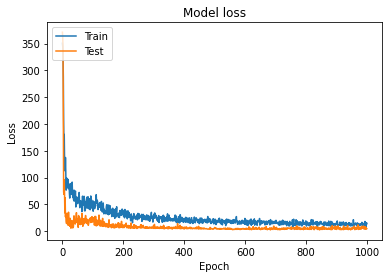

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:

test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values 
ip_test_at = test['AT'].values
test_output = test['TOTAL_AT'].values

scaler = MinMaxScaler(feature_range=(0, 1))
x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_at[k])
    
    temp_3D.append(temp_2D)

  data_input2D.append(temp_3D)
x_input.append(data_input2D)


x_input = np.concatenate( x_input, axis=0 )


x_test = x_input.reshape(-1,3,2)


actually:  [21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
model:  [19.690655 20.41974  20.786774 20.998981 21.066048 21.119406 21.18475
 21.18665  21.182825 21.179874 21.209576 21.24573  21.312983 21.39874
 21.494642 21.584366]
pecent:  [array([93.350426], dtype=float32), array([97.15834], dtype=float32), array([98.97422], dtype=float32), array([99.99515], dtype=float32), array([99.68647], dtype=float32), array([99.434616], dtype=float32), array([99.127914], dtype=float32), array([99.119026], dtype=float32), array([99.13692], dtype=float32), array([99.15073], dtype=float32), array([99.01188], dtype=float32), array([98.8434], dtype=float32), array([98.531494], dtype=float32), array([98.13661], dtype=float32), array([97.69877], dtype=float32), array([97.29264], dtype=float32)]
accuracy:  [98.41553]


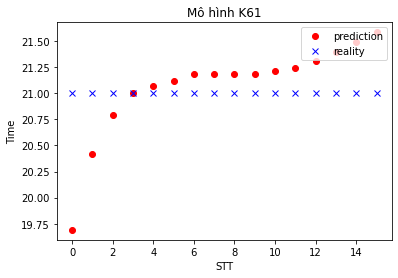

In [9]:
result = model.predict(x_test)

test_output = test_output[:result.size]

plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.title("Mô hình K61")
plt.xlabel("STT")
plt.ylabel("Time")
print("actually: ",test_output)
print("model: ", result.reshape(result.size))
percent = []
acc = 0
for i in range(0,result.size):
  p = (1- abs(test_output[i]-result[i])/result[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))

plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()
